## Q9

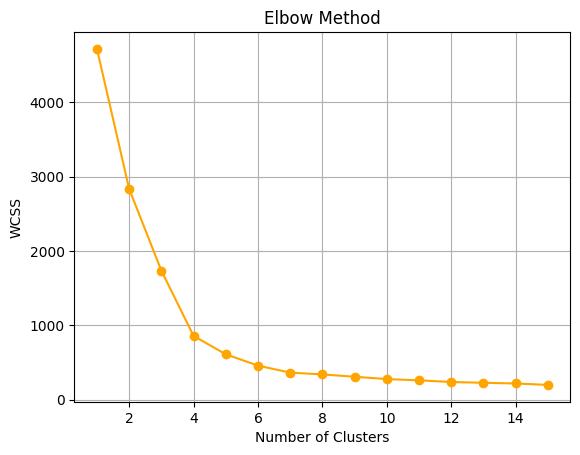

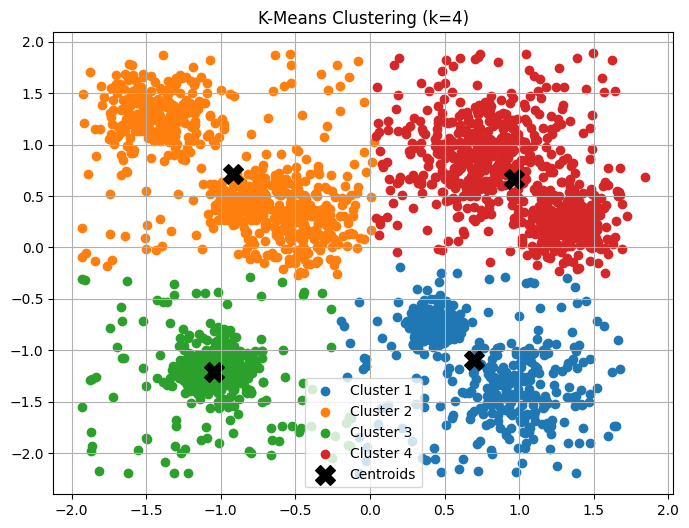

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/drive/MyDrive/A3_P1_7b27d5cc-755e-4f78-bab1-6c2373544adc.csv")
scaler = StandardScaler()
X = scaler.fit_transform(data)

wcss = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss, marker='o', color='orange')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Choose optimal k visually (taken from elbow method)
k = 4
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering (k=4)")
plt.grid(True)
plt.show()





## Q10

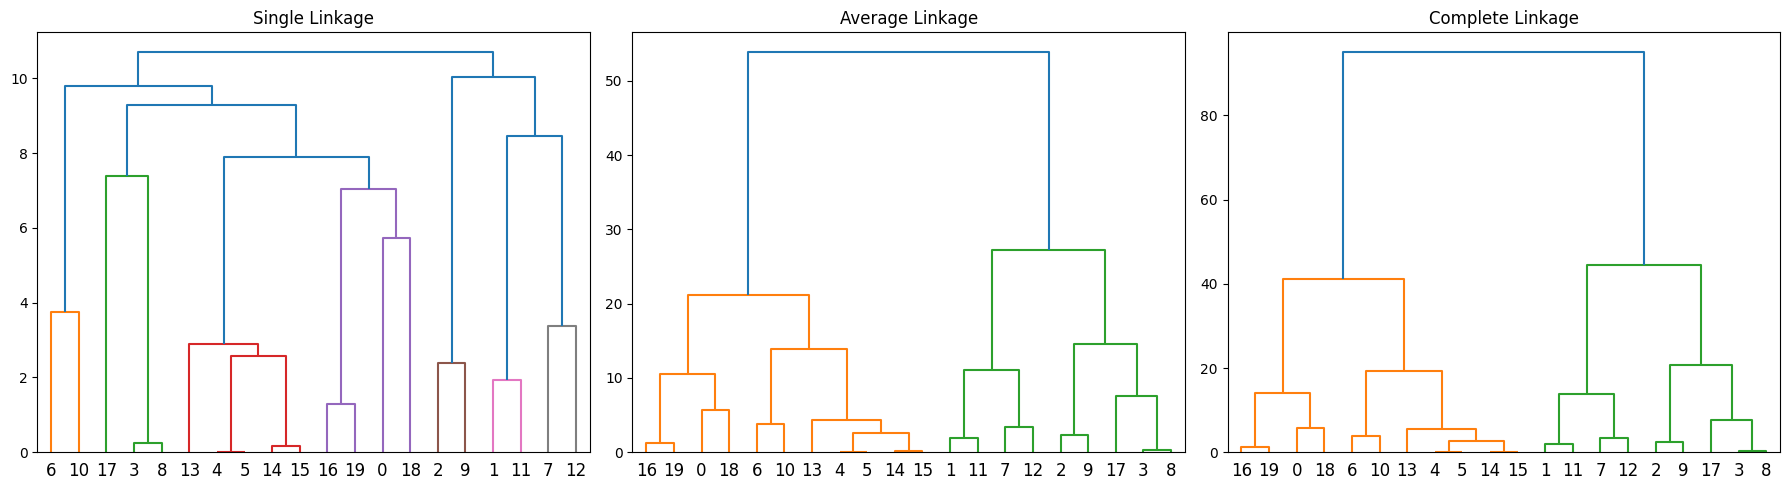

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram

data = pd.read_csv("/content/drive/MyDrive/A3_P2_170cd1d8-a072-4f67-ba36-10f26f772880.csv").values

def pairwise_distances(data):
    n = len(data)
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = euclidean(data[i], data[j])
            dists[i][j] = d
            dists[j][i] = d
    return dists

def linkage_distance(A, B, method, dist_matrix):
    if method == 'single':
        return np.min([dist_matrix[u][v] for u in A for v in B])
    elif method == 'average':
        return np.mean([dist_matrix[u][v] for u in A for v in B])
    elif method == 'complete':
        return np.max([dist_matrix[u][v] for u in A for v in B])

def hierarchical_clustering(data, method):
    n = len(data)
    dist_matrix = pairwise_distances(data)
    clusters = [[i] for i in range(n)]
    cluster_ids = list(range(n))
    next_id = n
    history = []

    while len(clusters) > 1:
        min_dist = float('inf')
        pair = (0, 1)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = linkage_distance(clusters[i], clusters[j], method, dist_matrix)
                if dist < min_dist:
                    min_dist = dist
                    pair = (i, j)

        i, j = pair
        ci, cj = cluster_ids[i], cluster_ids[j]
        merged = clusters[i] + clusters[j]
        history.append([ci, cj, min_dist, len(merged)])

        clusters.pop(j)
        clusters.pop(i)
        cluster_ids.pop(j)
        cluster_ids.pop(i)
        clusters.append(merged)
        cluster_ids.append(next_id)
        next_id += 1

    return np.array(history)

methods = ['single', 'average', 'complete']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, method in zip(axes, methods):
    Z = hierarchical_clustering(data, method)
    dendrogram(Z, ax=ax)
    ax.set_title(f"{method.capitalize()} Linkage")

plt.tight_layout()
plt.show()
